# 数据科学导论大作业AwesomeLoan by archester-250,1475505

## 第一部分：数据预处理

In [2]:
# 导库
import numpy as np
import pandas as pd

In [3]:
# 导入数据库
df = pd.read_csv('train-data.csv', index_col = None)
print(df.isnull().any())
x_train = df.iloc[:, 0 : df.shape[1] - 2].values
y_train = df.iloc[:, df.shape[1] - 1].values


Id                   False
Income                True
Age                  False
Experience           False
Married/Single       False
House_Ownership      False
Car_Ownership        False
Profession           False
CITY                 False
STATE                False
CURRENT_JOB_YRS      False
CURRENT_HOUSE_YRS    False
Risk_Flag            False
dtype: bool


## 第二部分：数据探索

In [9]:
#我们先看看有什么属性和对应的特征。
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,201600.000000,1.912070e+05,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,100799.500000,4.997339e+06,44.385208,10.085625,6.334072,11.995928,0.122778
std,58197.051472,2.881432e+06,22.491666,6.002003,3.644423,1.399482,0.328183
min,0.000000,1.031000e+04,0.000000,0.000000,0.000000,10.000000,0.000000
25%,50399.750000,2.499018e+06,29.000000,5.000000,3.000000,11.000000,0.000000
50%,100799.500000,5.000063e+06,46.000000,10.000000,6.000000,12.000000,0.000000
75%,151199.250000,7.480562e+06,63.000000,15.000000,9.000000,13.000000,0.000000
max,201599.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
# 这么看也是很不错的
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201600 entries, 0 to 201599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 201600 non-null  int64  
 1   Income             191207 non-null  float64
 2   Age                201600 non-null  int64  
 3   Experience         201600 non-null  int64  
 4   Married/Single     201600 non-null  object 
 5   House_Ownership    201600 non-null  object 
 6   Car_Ownership      201600 non-null  object 
 7   Profession         201600 non-null  object 
 8   CITY               201600 non-null  object 
 9   STATE              201600 non-null  object 
 10  CURRENT_JOB_YRS    201600 non-null  int64  
 11  CURRENT_HOUSE_YRS  201600 non-null  int64  
 12  Risk_Flag          201600 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 20.0+ MB


看，我们发现了什么？Income居然有空的情况，可能是不好意思写上去吧，这个时候有两种选择：
- 用统计特征值代替
- 直接丢弃对应的列
选哪个呢？[TODO]

In [12]:
# 我们还可以看一些有关房子年龄的分类统计
df['CURRENT_HOUSE_YRS'].value_counts().head(10)

12    41478
11    41386
13    40495
14    39138
10    39103
Name: CURRENT_HOUSE_YRS, dtype: int64

这么平均的吗

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

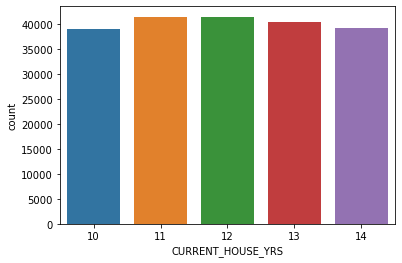

In [13]:
# 我们不妨可视化一下这些指标吧
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = "CURRENT_HOUSE_YRS", data = df)

## 第三部分：查看AUC